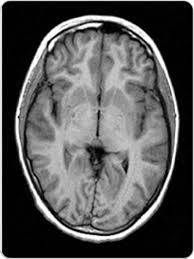

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from sklearn.preprocessing import StandardScaler

img = Image.open ('/content/20_no.jpg')
img = ImageOps.grayscale (img)
img

In [ ]:
import numpy as np

k = 6
cluster_centers = {} 

for i in range (k):
  cluster_centers[str(i)] = np.random.randint (0, 255) 
cluster_centers

{'0': 0, '1': 131, '2': 253, '3': 135, '4': 122, '5': 161}

In [ ]:
from math import sqrt

def dist(el1, el2):
  return sqrt((el2 - el1)**2)

def classify (el, centers):
  #print ("new element")
  min = 1000000

  for key in centers:
    if dist(el, centers[key]) < min:
      min = dist(el, centers[key])
      cluster = key
  return cluster

classes = {}
for i in range (k):
  classes[str(i)] = []

for x in range(img.size[0]):
  for y in range(img.size[1]):
    rgb = img.getpixel ((x, y))
    element = list ([x, y, rgb])
    assigned_cluster = classify (rgb, cluster_centers)
    classes[assigned_cluster].append (element)

In [ ]:
def mean(c): 
  return sum ([x[2] for x in c]) / len (c)

for i in range (100):

  for key in classes:
    cluster_centers[key] = mean (classes[key])
  
  for key in classes:
    classes[key] = []

  for x in range(img.size[0]):
    for y in range(img.size[1]):
      rgb = img.getpixel ((x, y))
      element = list ([x, y, rgb])
      assigned_cluster = classify (rgb, cluster_centers)
      classes[assigned_cluster].append (element)

classes

{'0': [[2, 7, 4],
  [2, 8, 25],
  [2, 9, 25],
  [2, 10, 26],
  [2, 11, 26],
  [2, 12, 27],
  [2, 13, 28],
  [2, 14, 28],
  [2, 15, 29],
  [2, 16, 23],
  [2, 17, 23],
  [2, 18, 23],
  [2, 19, 23],
  [2, 20, 23],
  [2, 21, 23],
  [2, 22, 23],
  [2, 23, 23],
  [2, 24, 17],
  [2, 25, 17],
  [2, 26, 17],
  [2, 27, 17],
  [2, 28, 17],
  [2, 29, 17],
  [2, 30, 17],
  [2, 31, 17],
  [2, 32, 17],
  [2, 33, 17],
  [2, 34, 17],
  [2, 35, 17],
  [2, 36, 17],
  [2, 37, 17],
  [2, 38, 17],
  [2, 39, 17],
  [2, 40, 17],
  [2, 41, 17],
  [2, 42, 17],
  [2, 43, 17],
  [2, 44, 17],
  [2, 45, 17],
  [2, 46, 17],
  [2, 47, 17],
  [2, 48, 23],
  [2, 49, 23],
  [2, 50, 23],
  [2, 51, 23],
  [2, 52, 23],
  [2, 53, 23],
  [2, 54, 23],
  [2, 55, 23],
  [2, 56, 24],
  [2, 57, 24],
  [2, 58, 24],
  [2, 59, 24],
  [2, 60, 24],
  [2, 61, 24],
  [2, 62, 24],
  [2, 63, 24],
  [2, 64, 17],
  [2, 65, 17],
  [2, 66, 17],
  [2, 67, 17],
  [2, 68, 17],
  [2, 69, 17],
  [2, 70, 17],
  [2, 71, 17],
  [2, 72, 17],
  [2, 73,

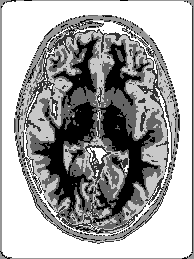

In [ ]:
rgbimg = Image.new ("RGB", img.size)
rgbimg.paste (img)

for element in classes['0']:
  rgbimg.putpixel ((element[0], element[1]), (255, 255, 255))

for element in classes['1']:
  rgbimg.putpixel ((element[0], element[1]), (200, 200, 200))

for element in classes['2']:
  rgbimg.putpixel ((element[0], element[1]), (150, 150, 150))

for element in classes['3']:
  rgbimg.putpixel ((element[0], element[1]), (100, 100, 100))

for element in classes['4']:
  rgbimg.putpixel ((element[0], element[1]), (50, 50, 50))

for element in classes['5']:
  rgbimg.putpixel ((element[0], element[1]), (0, 0, 0))
"""
for element in classes['6']:
  rgbimg.putpixel ((element[0], element[1]), (0, 0, 0))

for element in classes['7']:
  rgbimg.putpixel ((element[0], element[1]), (255, 255, 255))

for element in classes['8']:
  rgbimg.putpixel ((element[0], element[1]), (127, 0, 127))

for element in classes['9']:
  rgbimg.putpixel ((element[0], element[1]), (0, 127, 0))

for element in classes['10']:
  rgbimg.putpixel ((element[0], element[1]), (127, 127, 0))

for element in classes['11']:
  rgbimg.putpixel ((element[0], element[1]), (0, 127, 127))
"""

rgbimg

In [ ]:
radius = 55
centroids = []
for i in range (3):
  for j in range (3):
    x = i *(int (img.size[0] / 3)) + int ((img.size[0] / 3) / 2)
    y = j *(int (img.size[1] / 3)) + int ((img.size[1] / 3) / 2)
    centroids.append (img.getpixel ((x, y)))

centroids

[4, 107, 9, 136, 114, 41, 2, 145, 3]

In [ ]:
for centroid in centroids:
  for i in range (10):
    neighbors = []
    for x in range (img.size[0]):
      for y in range (img.size[1]):
        if dist (centroid, img.getpixel ((x, y))) <= radius:
          neighbors.append (img.getpixel ((x, y)))
    centroid = mean ()
  